In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

### 0. Load data

In [81]:
df = pd.read_csv('./data/netflix_titles.csv')
df.shape

(8807, 12)

In [82]:
df = df.dropna( how='any',subset=['cast', 'director'])
df = df.dropna()

In [83]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


### 1. Line plot 

In [40]:
x = np.arange(0, 5, 0.1)
def square(x):
    return x**2

def cubic(x):
    return 5 * x**0.5

Plotly themes:
- 'ggplot2' 
- 'seaborn' 
- 'simple_white' 
- 'plotly'
- 'plotly_white' 
- 'plotly_dark' 
- 'presentation'
- 'xgridoff'
- 'ygridoff' 
- 'gridon' 

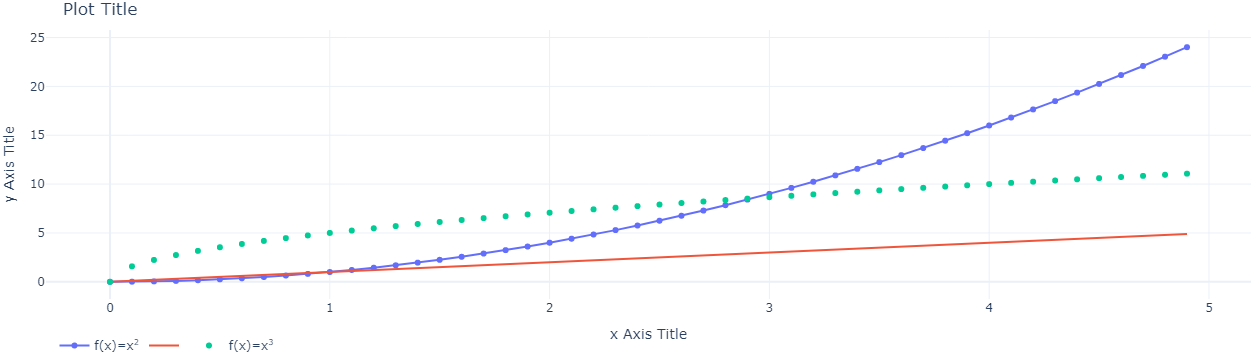

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=square(x), mode='lines+markers' , name='f(x)=x<sup>2</sup>')) # use <sup> because LATEX doens't work for hint
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.add_trace(go.Scatter(x=x, y=cubic(x), mode='markers' , name='f(x)=x<sup>3</sup>'))
fig.update_layout(legend_orientation="h", 
                  legend=dict(x=.1, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  template = 'plotly_white',
                  margin=dict(l=5, r=5, t=30, b=20) # by default 20 px
                 )
fig.show()

### 1. Scatter plot 

In [42]:
np.random.seed(0)
x_var = np.random.normal(size = 6000)
y_var = np.random.normal(size = 6000)

norm_data = pd.DataFrame({'x_var':x_var
                         ,'y_var':y_var}
                         )

norm_data = norm_data.assign(category_var = np.where(x_var > 1, "Category A","Category B"))

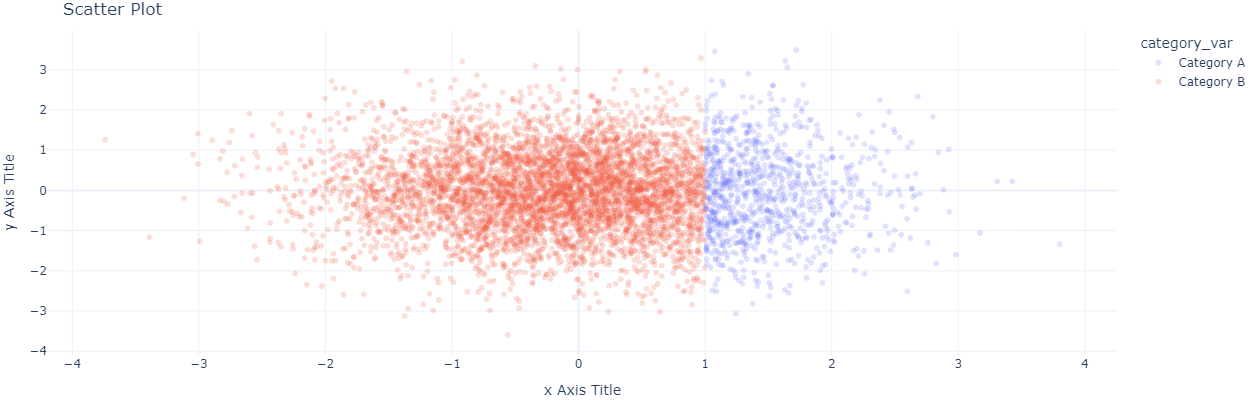

In [52]:
fig = px.scatter(data_frame = norm_data
                 ,x = 'x_var'
                 ,y = 'y_var'
                 ,color = 'category_var'
                 ,opacity = .2,
                )
fig.update_layout(title="Scatter Plot",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  template = 'plotly_white',
                  margin=dict(l=5, r=5, t=30, b=20),
                  width=800, height=400
                 )
fig.show()

### 2. Subplots

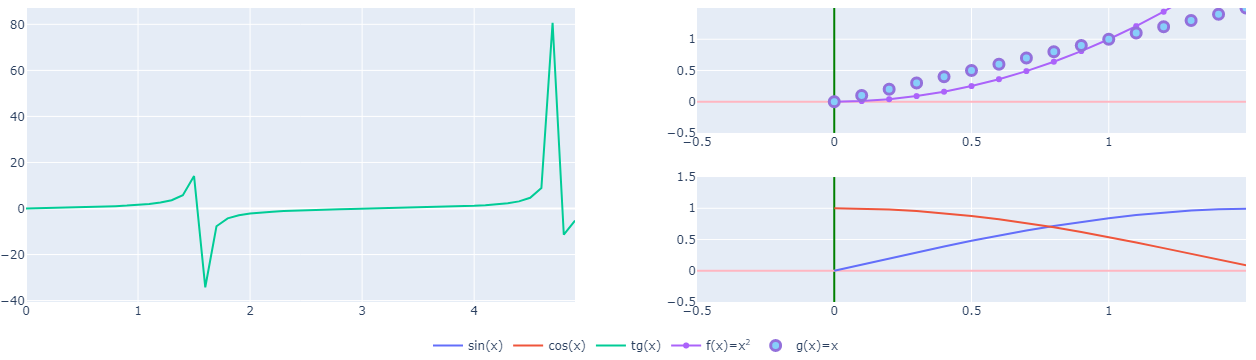

In [59]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"rowspan": 2}, {}], [None, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=np.sin(x),  name='sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=np.cos(x),  name='cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=np.tan(x),  name='tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=square(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=10, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Value: %{x}<br>Function: %{y}")
fig.show()

### 3. Bar plots

In [84]:
df_rating = pd.DataFrame(df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'count'})
df_rating.head()

,rating,count
0,TV-MA,1822
1,TV-14,1214
2,R,778
3,PG-13,470
4,TV-PG,431


#### 3.0. Simple bar plot 

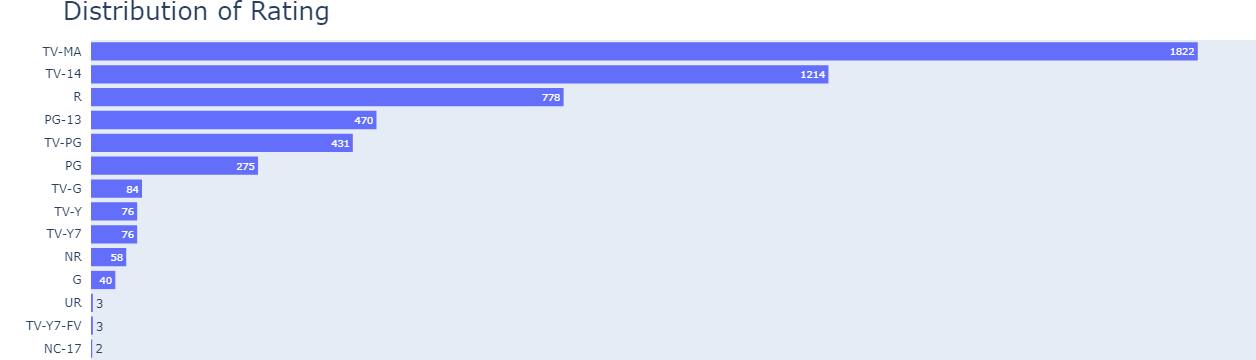

In [85]:
fig_bar = px.bar(df_rating, y='rating', x='count', 
                 title='Distribution of Rating',
                 # color_discrete_sequence=['#b20710'], 
                 text='count'
                )
fig_bar.update_xaxes(visible=False)
fig_bar.update_yaxes(showgrid=False, 
                     categoryorder='total ascending', 
                     ticksuffix='  ', 
                     showline=False)
fig_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_bar.update_layout(margin=dict(t=40, b=0, l=0, r=0),
                      hovermode="y unified", 
                      xaxis_title=' ', yaxis_title=" ",
                      title_font=dict(size=25),
                      legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                     )

#### 3.1. Stacked Bar Plot

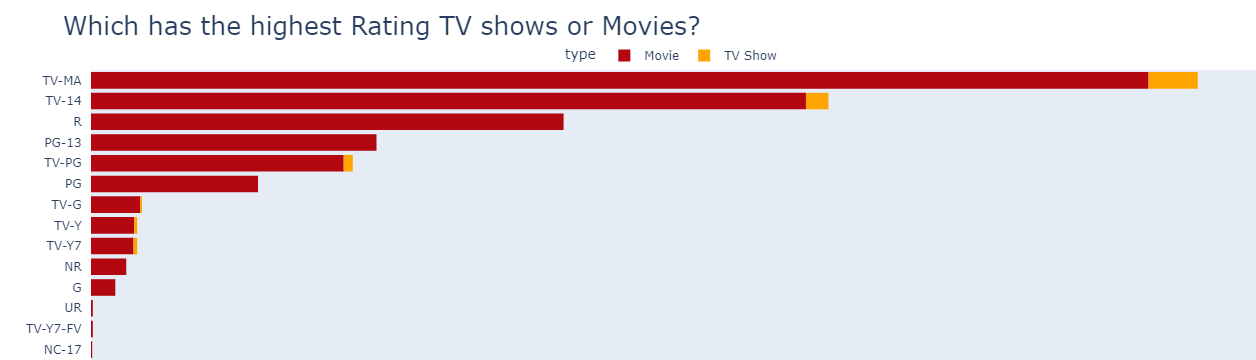

In [94]:
fig_stack_bar = px.histogram(df, y='rating', color='type', title='Which has the highest Rating TV shows or Movies?',
                             color_discrete_sequence=['#b20710', 'orange'])
fig_stack_bar.update_xaxes(visible=False)
fig_stack_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix='  ', showline=False)
fig_stack_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_stack_bar.update_layout(margin=dict(t=70, b=0, l=0, r=0),
                            hovermode="y unified", 
                            xaxis_title=' ', yaxis_title=" ",
                            title_font=dict(size=25),
                            legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                           )

#### 3.2. Group Bar Chart

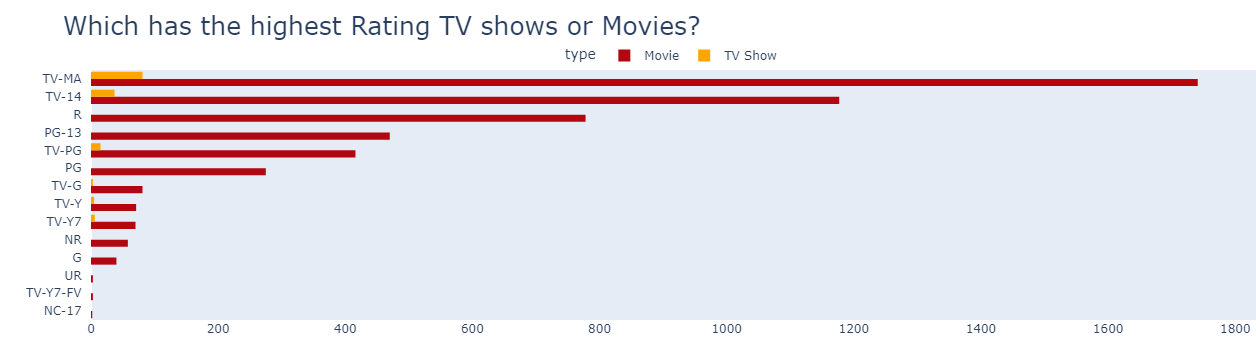

In [95]:
fig_group_bar = px.histogram(df, y='rating', color='type', title='Which has the highest Rating TV shows or Movies?',
                             color_discrete_sequence=['#b20710', 'orange'], barmode='group')
fig_group_bar.update_xaxes(showgrid=False)
fig_group_bar.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix='  ', showline=False)
fig_group_bar.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig_group_bar.update_layout(margin=dict(t=70, b=0, l=0, r=0),
                            hovermode="y unified", 
                            xaxis_title=' ', yaxis_title=" ",
                            title_font=dict(size=25),
                            legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                           )

#### 3.3. Bidirectional Bar Plot

In [131]:
# making a copy of df
dff = df.copy()

# making 2 df one for tv show and another for movie with rating 
df_tv_show = dff[dff['type']=='TV Show'][['rating', 'type']].rename(columns={'type':'tv_show'})
df_movie = dff[dff['type']=='Movie'][['rating', 'type']].rename(columns={'type':'movie'})

df_tv_show = pd.DataFrame(df_tv_show.rating.value_counts()).reset_index().rename(columns={'index':'tv_show'})
df_tv_show['rating_final'] = df_tv_show['rating'] 
# making rating column value negative
df_tv_show['rating'] *= -1

df_movie = pd.DataFrame(df_movie.rating.value_counts()).reset_index().rename(columns={'index':'movie'})
df_movie = df_movie.sort_values(by=['rating']) # sort for order on plot

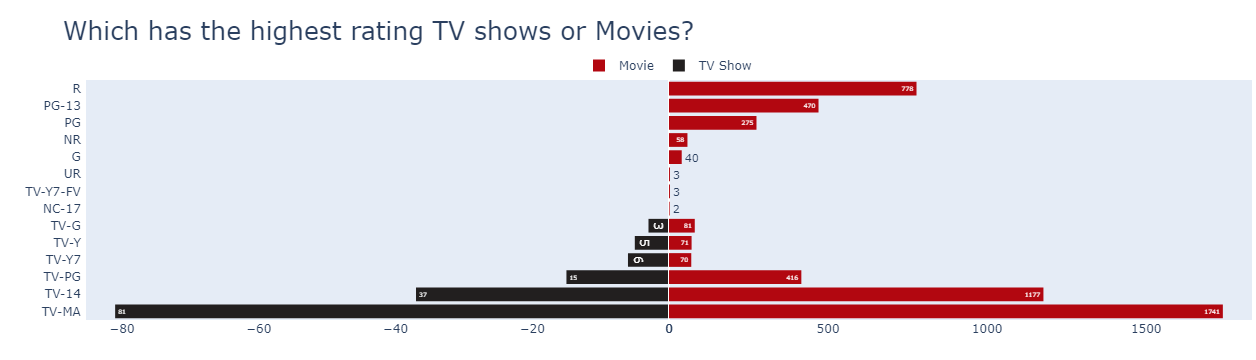

In [133]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)
# bar plot for movies
fig.append_trace(go.Bar(x=df_movie.rating, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating,
                        name='Movie', marker_color='#b20710'), 1, 2)
# bar plot for tv shows
fig.append_trace(go.Bar(x=df_tv_show.rating, y=df_tv_show.tv_show, orientation='h', showlegend=True, 
                        text=df_tv_show.rating_final, name='TV Show', marker_color='#221f1f'), 1, 1)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(title='Which has the highest rating TV shows or Movies?',
                  margin=dict(t=80, b=0, l=0, r=0),
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  title_font=dict(size=25),
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                 )